In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python

In [3]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
path ='/content/drive/MyDrive/Colab Notebooks/DataSet/iron.webp'

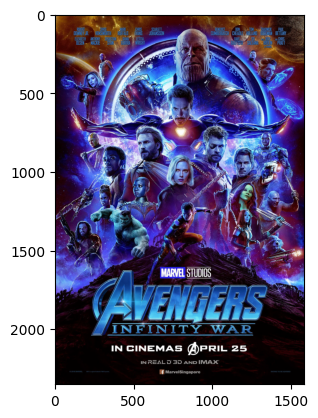

In [6]:
img = cv2.imread(path)
plt.imshow(img)

### BGR to RGB (Color Convertion)

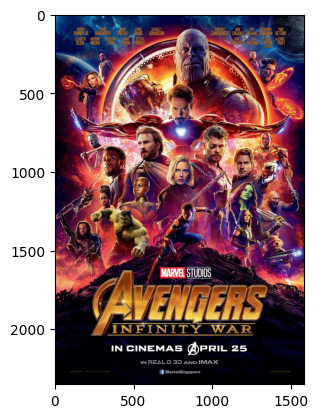

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
img.shape

(2351, 1588, 3)

In [9]:
img.ndim

3

#Image Re-sizing

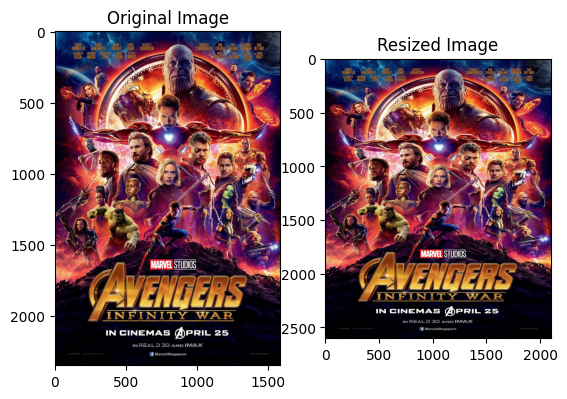

In [14]:
# Let's downscale the image using new width and height
down_width = 2100
down_height = 2600
down_points = (down_width, down_height)
resized_down = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)


plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(resized_down)
plt.title('Resized Image')
plt.show()

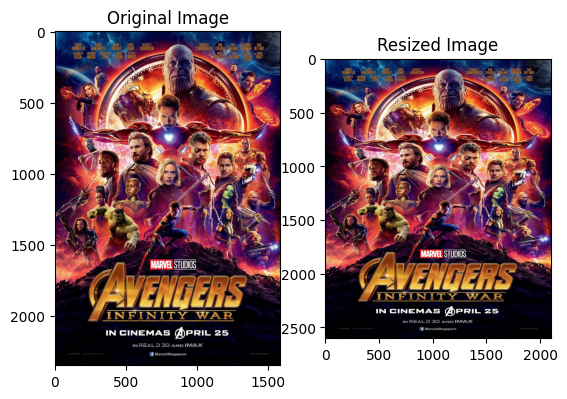

In [15]:
# Let's upscale the image using new width and height
up_width = 2100
up_height = 2600
down_points = (up_width, up_height)
resized_down = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)


plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(resized_down)
plt.title('Resized Image')
plt.show()

In [19]:
# to get the size of images
height , width = img.shape[:2]
height, width

(2351, 1588)

In [20]:
#center of the Image
center = (width/2, height/2)
center

(794.0, 1175.5)

### To rotate Image

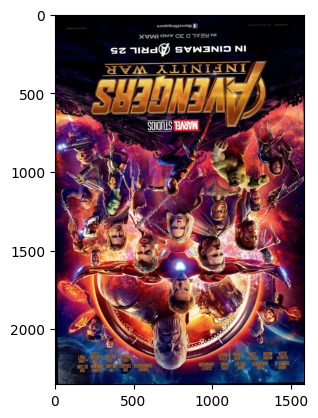

In [21]:
rotated_matrix = cv2.getRotationMatrix2D(center=center, angle=181, scale=1)
rotated_image = cv2.warpAffine(src=img, M=rotated_matrix, dsize=(width, height))
plt.imshow(rotated_image)

### Cropping Image (Zoming Image)

(200, 180, 3)


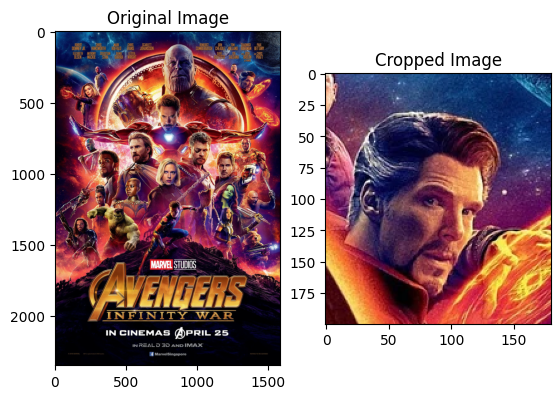

In [23]:
# Lets Crop the image
cropped_image = img[250:450, 1270:1450]
print(cropped_image.shape)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()

# Cricling on praticular object in Image

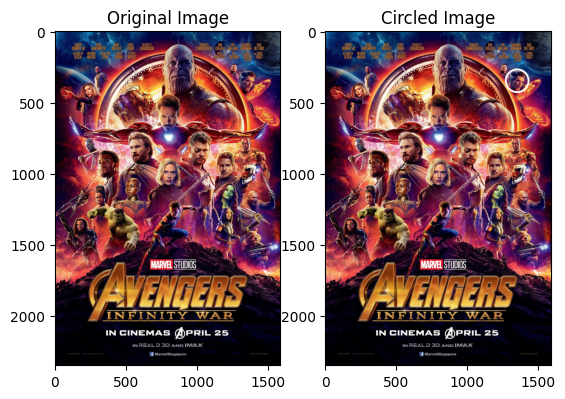

In [24]:
# Drawing a Circle
imageCircle = img.copy()

# define the center of circle
circle_center = (1350,350)

# define the radius of the circle
radius =80

# Draw a circle using the circle() Function
cv2.circle(imageCircle, circle_center, radius, (255, 255, 255), thickness=11, lineType=cv2.LINE_AA)

# Display the result
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(imageCircle)
plt.title('Circled Image')
plt.show()

# Fuly Cricling on praticular object in Image

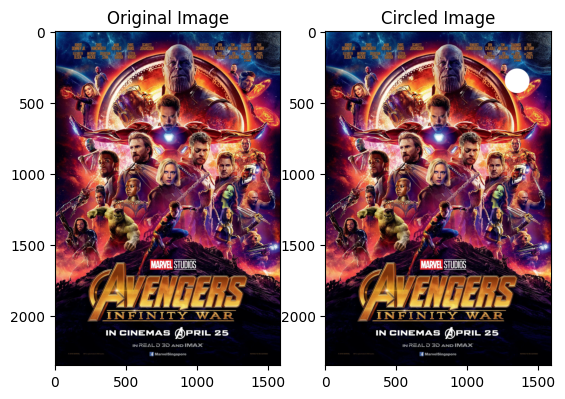

In [25]:
# define the radius of the circle
radius =80

# Draw a circle using the circle() Function
cv2.circle(imageCircle, circle_center, radius, (255, 255, 255), thickness=-3, lineType=cv2.LINE_AA)

# Display the result
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(imageCircle)
plt.title('Circled Image')
plt.show()

# Fuly cover Rectangle on praticular object in Image

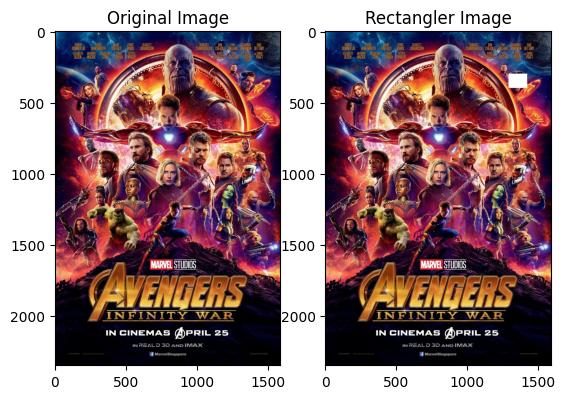

In [26]:
imageRectangle = img.copy()
# define the start and end of rectangle
start_point = (1290,300)
end_point = (1420,400)

# Draw a circle using the circle() Function
cv2.rectangle(imageRectangle,start_point,end_point , (255, 255, 255), thickness=-3, lineType=cv2.LINE_8)

# Display the result
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(imageRectangle)
plt.title('Rectangler Image')
plt.show()

# Rectangle on praticular object in Image

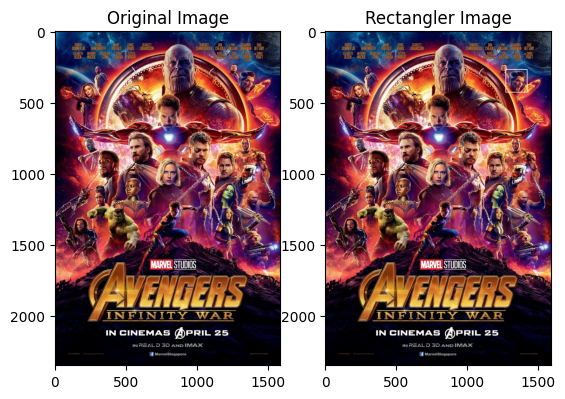

In [31]:
imageRectangle = img.copy()
# define the start and end of rectangle
start_point = (1270,270)
end_point = (1420,430)

# Draw a circle using the circle() Function
cv2.rectangle(imageRectangle,start_point,end_point , (255, 255, 255), thickness=3, lineType=cv2.LINE_8)

# Display the result
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(imageRectangle)
plt.title('Rectangler Image')
plt.show()

## Drawing an Ellipse

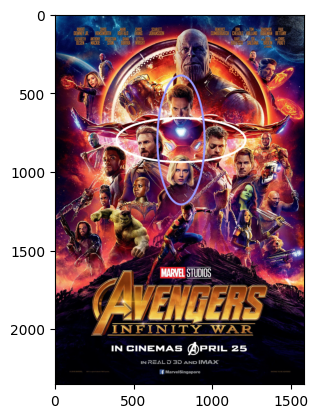

In [32]:
imageEllipse = img.copy()

ellipse_center = (800,800)


axis1 = (410,140)
axis2 = (410,150)

cv2.ellipse(imageEllipse, (int(ellipse_center[0]), int(ellipse_center[1])), axis1, 0, 0, 360, (255, 255, 255),
thickness=12)

cv2.ellipse(imageEllipse, (int(ellipse_center[0]), int(ellipse_center[1])), axis2, 90, 0, 360, (155, 155, 255),
thickness=12)

plt.imshow(imageEllipse)

## Identity applying in Image

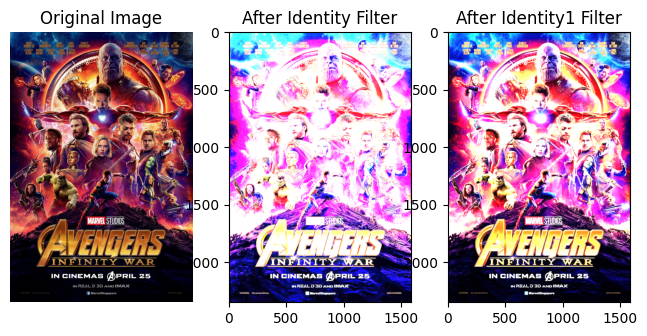

In [34]:
import numpy as np

# Correct identity kernel
kernel1 = np.array([[10, 5, -1],
[-5, 1, 0],
[0, 0, 1]])

kernel2 = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])

# Apply filter
identity = cv2.filter2D(src=img, ddepth =- 1, kernel=kernel1)
identity1 = cv2.filter2D(src=img, ddepth =- 1, kernel=kernel2)

# Plot images
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("After Identity Filter")
plt.imshow(identity)

plt.subplot(1,3,3)
plt.title("After Identity1 Filter")
plt.imshow(identity1)

### Blur the image for better edge detection

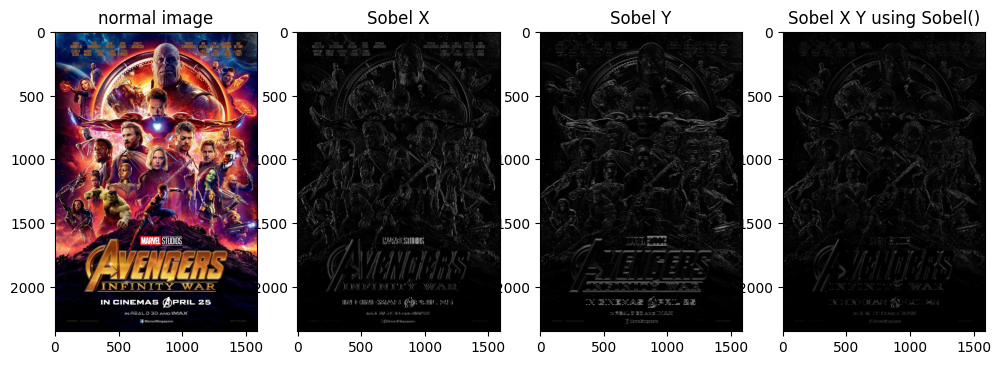

In [36]:
img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

#Removes noise

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(img)
plt.title('normal image')

plt.subplot(142)
plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Sobel X')

plt.subplot(143)
plt.imshow(np.abs(sobely), cmap='gray')
plt.title('Sobel Y')

plt.subplot(144)
plt.imshow(np.abs(sobelxy), cmap='gray')
plt.title('Sobel X Y using Sobel()')

plt.show()